Predicting finally

<div style="position: relative; background: #3567A8; color: white; padding: 10px 15px; text-align: center; border-radius: 6px;">
    <span style="position: absolute; left: -25px; top: 10px; transform: rotate(-45deg); background: #3567A8; padding: 5px 10px; border-radius: 3px;">Section 1</span>
    <h1 style="font-size: 30px;">Dataset Preperation </h1>
</div>

In [30]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import pyarrow.feather as feather
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import pandas as pd

In [31]:
#Load the feather file into a car_df
car_df = feather.read_feather('processed_data.feather')

In [32]:
car_df.columns

Index(['year', 'brand', 'model', 'trim', 'body', 'transmission', 'condition',
       'odometer', 'color', 'interior', 'sellingprice', 'brand_model',
       'car_age', 'mileage_per_year', 'market_price_deviation', 'brand_label',
       'trim_label', 'body_label', 'color_label', 'interior_label',
       'transmission_label'],
      dtype='object')

In [33]:
car_df.head()

,year,brand,model,trim,body,transmission,condition,odometer,color,interior,...,brand_model,car_age,mileage_per_year,market_price_deviation,brand_label,trim_label,body_label,color_label,interior_label,transmission_label
2,2014,Bmw,3 Series,Others,Sedan,Automatic,1.145277,-1.364964,Silver,Black,...,Bmw_3 Series,-1.021999,-2.023111,-1.773132,8,0,1,1,1,0
3,2015,Others,Others,Others,Sedan,Automatic,0.719401,-1.086219,White,Black,...,Others_Others,-1.311799,-0.107857,0.287817,0,0,1,3,1,0
4,2014,Bmw,Others,Others,Sedan,Automatic,0.932339,-1.336769,Silver,Black,...,Bmw_Others,-1.311799,-0.107857,1.006753,8,0,1,1,1,0
6,2014,Bmw,Others,Base,Sedan,Automatic,-0.025882,-1.071992,Black,Black,...,Bmw_Others,-1.311799,-0.107857,0.000243,8,1,1,2,1,0
7,2014,Chevrolet,Others,Others,Sedan,Automatic,-1.516450,-0.777685,Black,Black,...,Chevrolet_Others,-1.311799,-0.107857,-1.964848,2,0,1,2,1,0


> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>Train, test, validation split</b></font></div>

In [34]:
X = car_df[['year', 'odometer','car_age', 'mileage_per_year', 'market_price_deviation', 
            'brand_label', 'trim_label', 'body_label', 'color_label', 'interior_label',
            'transmission_label']].copy()
y = car_df[['sellingprice']].copy()

In [35]:
#Splitting the original dataset into train and test sets (80-20 split)
X_train_test, X_test, y_train_test, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Further splitting the training-test set into training and validation sets (80-20 split)
X_train, X_val, y_train, y_val = train_test_split(X_train_test, y_train_test, test_size=0.2, random_state=77)

In [36]:
#Checking the sizes or shapes of each set
print("Train set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

#Printing a few rows from each set to inspect the data
print("\nSample rows from Train set:")
print(X_train.head())
print(y_train.head())

print("\nSample rows from Validation set:")
print(X_val.head())
print(y_val.head())

print("\nSample rows from Test set:")
print(X_test.head())
print(y_test.head())

Train set shape: (357510, 11) (357510, 1)
Validation set shape: (89378, 11) (89378, 1)
Test set shape: (111722, 11) (111722, 1)

Sample rows from Train set:
        year  odometer   car_age  mileage_per_year  market_price_deviation  \
417744  2013 -1.080730 -0.732200         -1.144580               -0.718693   
294478  2012 -0.373266 -0.442400          0.118112                1.006753   
481987  2013 -0.237305 -0.732200          1.754535               -0.455083   
78199   2002 -0.268589  2.455598          0.157706               -0.526976   
20667   2006  2.516962  1.006599          1.140414               -0.071650   

        brand_label  trim_label  body_label  color_label  interior_label  \
417744            1           0           2            4               1   
294478            1           6           2            1               1   
481987            7           9           1            3               4   
78199             3           2           2            0              

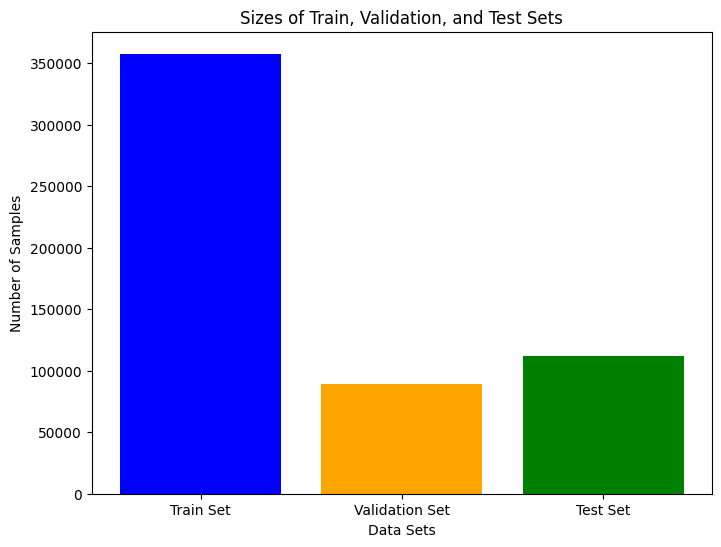

In [37]:
#Checking the sizes of each dataset
#Data for plotting
sets = ['Train Set', 'Validation Set', 'Test Set']  #Labels for different dataset types
sizes = [len(X_train), len(X_val), len(X_test)]  #Number of samples in each dataset

#Plotting the sizes of datasets
plt.figure(figsize=(8, 6)) 
plt.bar(sets, sizes, color=['blue', 'orange', 'green'])
plt.xlabel('Data Sets') 
plt.ylabel('Number of Samples')
plt.title('Sizes of Train, Validation, and Test Sets') 
plt.show()

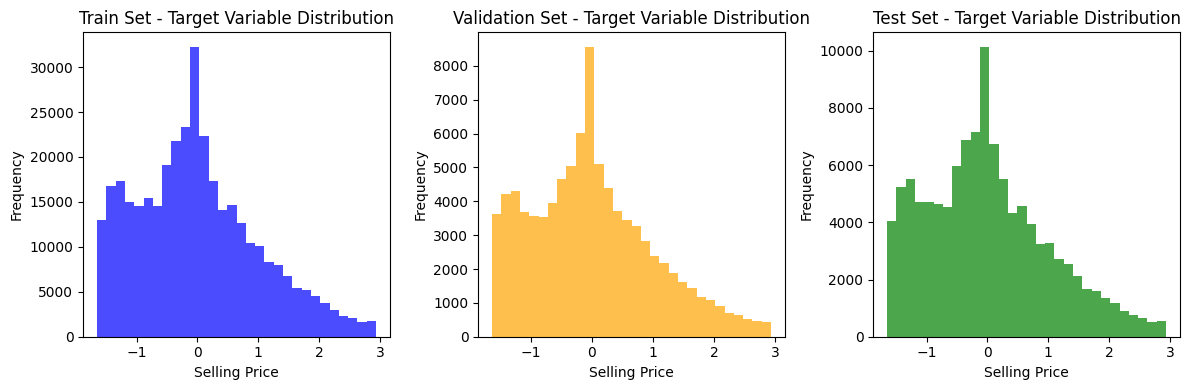

In [38]:
#Plotting histograms for the target variable in each dataset
plt.figure(figsize=(12, 4))

#Subplot for Train Set
plt.subplot(1, 3, 1)
plt.hist(y_train, bins=30, color='blue', alpha=0.7) 
plt.title('Train Set - Target Variable Distribution')
plt.xlabel('Selling Price')  
plt.ylabel('Frequency')

#Subplot for Validation Set
plt.subplot(1, 3, 2)
plt.hist(y_val, bins=30, color='orange', alpha=0.7) 
plt.title('Validation Set - Target Variable Distribution')  
plt.xlabel('Selling Price')  
plt.ylabel('Frequency')

#Subplot for Test Set
plt.subplot(1, 3, 3) 
plt.hist(y_test, bins=30, color='green', alpha=0.7)
plt.title('Test Set - Target Variable Distribution')
plt.xlabel('Selling Price') 
plt.ylabel('Frequency')

plt.tight_layout() 
plt.show()

In [39]:
X_train.head()

,year,odometer,car_age,mileage_per_year,market_price_deviation,brand_label,trim_label,body_label,color_label,interior_label,transmission_label
417744,2013,-1.080730,-0.732200,-1.144580,-0.718693,1,0,2,4,1,0
294478,2012,-0.373266,-0.442400,0.118112,1.006753,1,6,2,1,1,0
481987,2013,-0.237305,-0.732200,1.754535,-0.455083,7,9,1,3,4,0
78199,2002,-0.268589,2.455598,0.157706,-0.526976,3,2,2,0,2,0
20667,2006,2.516962,1.006599,1.140414,-0.071650,7,3,1,0,0,0


In [40]:
X_test.head()

,year,odometer,car_age,mileage_per_year,market_price_deviation,brand_label,trim_label,body_label,color_label,interior_label,transmission_label
243545,2010,0.425736,0.137200,0.281414,-1.221948,5,2,4,1,3,0
94742,2002,2.657616,2.455598,-0.077692,0.072137,0,4,2,0,2,0
429004,2012,-0.426105,-0.442400,-0.002971,-0.191473,3,0,1,1,1,0
223237,2012,-1.067644,-0.442400,-1.473083,0.048172,3,0,1,0,2,0
46574,2006,-0.086084,1.006599,-1.096455,0.719179,0,0,1,2,4,1


In [41]:
X_val.head()

,year,odometer,car_age,mileage_per_year,market_price_deviation,brand_label,trim_label,body_label,color_label,interior_label,transmission_label
327760,2009,1.315823,0.426999,0.884339,-0.359225,1,10,1,4,3,0
503370,2007,0.759257,1.006599,-0.370030,-0.958338,4,0,1,2,2,0
116018,2008,0.734312,0.716799,-0.130240,-0.119579,3,0,2,3,1,0
73529,2014,-1.263849,-1.021999,-1.327980,-0.431118,0,0,2,0,1,0
198543,2013,-0.141828,-0.732200,2.082717,0.335747,3,10,2,1,2,0


<div style="position: relative; background: #3567A8; color: white; padding: 10px 15px; text-align: center; border-radius: 6px;">
    <span style="position: absolute; left: -25px; top: 10px; transform: rotate(-45deg); background: #3567A8; padding: 5px 10px; border-radius: 3px;">Section 1</span>
    <h1 style="font-size: 30px;">Model Fitting </h1>
</div>

> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>Random Forest</b></font></div>

In [42]:
#Initialise a Random Forest Regressor with specified hyperparameters
random_forest = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=420)

#Train the model using the training data
random_forest.fit(X_train, y_train)

#Validation Set Evaluation
#Make predictions on the validation set
predictions = random_forest.predict(X_val)

#Calculate Mean Squared Error (MSE) on the validation set
mse = mean_squared_error(y_val, predictions)

#Print the Mean Squared Error (MSE) for the validation set
print(f"Mean Squared Error (MSE) on Validation Set: {mse:.2f}")

/Users/cansenturk/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Squared Error (MSE) on Validation Set: 0.29


#### The MSE value of 0.29 indicates the average squared difference between the predicted and actual values in the validation set. Lower MSE values generally imply better performance, indicating that, on average, the model's predictions are close to the actual values in the validation set. 

In [43]:
#Convert y_train to a 1-dimensional array using ravel
y_train_1d = np.ravel(y_train)

#Create a Random Forest Regressor model with specified parameters
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=420)

#Perform 5-fold cross-validation using negative mean squared error as the scoring metric
cv_scores = cross_val_score(rf, X_train, y_train_1d, cv=5, scoring='neg_mean_squared_error')

#Convert the negative scores to positive since neg_mean_squared_error is used
cv_scores = -cv_scores

#Display the cross-validation scores for each fold
print("Cross-validation Scores:", cv_scores)

#Calculate the mean cross-validation score
print("Mean CV Score:", cv_scores.mean())

Cross-validation Scores: [0.28476332 0.28731066 0.28665268 0.28659197 0.28317432]
Mean CV Score: 0.285698589111288


#### These cross-validation scores represent the performance of the Random Forest Regressor model on different folds of the training data. The mean cross-validation score provides an overall assessment of the model's predictive performance on the training data.

#### The accuracy could may be better, so by hyperparameter tuning with a random grid we want to find better hyper parameters

In [44]:
#Defining a large and refined parameter grid
param_dist = {
    'n_estimators': randint(50, 500),
    'max_depth': randint(5, 20), 
}

#Randomised Search with 5-fold cross-validation
rf = RandomForestRegressor(random_state=420)
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=10, cv=5,
                                   scoring='neg_mean_squared_error', random_state=420, n_jobs=-1)
random_search.fit(X_train, y_train_1d)

#Get the best hyperparameters and best score
best_params_random = random_search.best_params_
best_score_random = -random_search.best_score_

print("Best Hyperparameters (Randomized Search):", best_params_random)
print("Best CV Score (Randomized Search):", best_score_random)

#Accessing the results of Randomized Search
results_df = pd.DataFrame(random_search.cv_results_)
results_df = results_df.sort_values(by='rank_test_score')  #Sorting by rank for better visibility
desired_columns = ['params', 'mean_test_score', 'rank_test_score']
print("\nParameters Tried in Randomized Search:")
print(results_df[desired_columns])

/Users/cansenturk/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Hyperparameters (Randomized Search): {'max_depth': 19, 'n_estimators': 280}
Best CV Score (Randomized Search): 0.24178813621780554

Parameters Tried in Randomized Search:
                                   params  mean_test_score  rank_test_score
6  {'max_depth': 19, 'n_estimators': 280}        -0.241788                1
5  {'max_depth': 19, 'n_estimators': 201}        -0.241952                2
4  {'max_depth': 15, 'n_estimators': 378}        -0.245722                3
3  {'max_depth': 14, 'n_estimators': 204}        -0.249950                4
8  {'max_depth': 13, 'n_estimators': 182}        -0.255713                5
1  {'max_depth': 11, 'n_estimators': 113}        -0.272979                6
9  {'max_depth': 10, 'n_estimators': 232}        -0.285578                7
7   {'max_depth': 9, 'n_estimators': 341}        -0.301620                8
2   {'max_depth': 8, 'n_estimators': 480}        -0.322285                9
0   {'max_depth': 6, 'n_estimators': 122}        -0.376936      

#### The code searched various hyperparameter combinations for a Random Forest Regressor. After assessing multiple settings, it was found that using 280 estimators and a maximum tree depth of 19 resulted in the best performance, achieving a mean squared error of around 0.242 during cross-validation. This optimisation enhanced the model's predictive accuracy, providing improved parameter values for the given dataset.

In [45]:
#After Hyperparameter Tuning Evaluation
#Creating a RandomForestRegressor with tuned hyperparameters
random_forest_after_tuning = RandomForestRegressor(n_estimators=280, max_depth=19, random_state=420)

#Training the model with the tuned hyperparameters on the training data
random_forest_after_tuning.fit(X_train, y_train)

#Making predictions on the validation set using the tuned model
predictions_after_tuning = random_forest_after_tuning.predict(X_val)

#Calculating the Mean Squared Error (MSE) on the validation set after tuning
mse_after_tuning = mean_squared_error(y_val, predictions_after_tuning)
print(f"Mean Squared Error (MSE) on Validation Set after Tuning: {mse_after_tuning}")

/Users/cansenturk/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Squared Error (MSE) on Validation Set after Tuning: 0.2404159046826253


#### By applying the newly discovered hyperparameters, the objective is to validate and confirm the effectiveness of the previous code in improving the model's performance.

In [46]:
#Cross-validation after Tuning
rf_after_tuning = RandomForestRegressor(n_estimators=280, max_depth=19, random_state=420)
cv_scores_after_tuning = cross_val_score(rf_after_tuning, X_train, y_train_1d, cv=5, scoring='neg_mean_squared_error')
cv_scores_after_tuning = -cv_scores_after_tuning
print("Cross-validation Scores After Tuning:", cv_scores_after_tuning)
print("Mean CV Score After Tuning:", cv_scores_after_tuning.mean())

Cross-validation Scores After Tuning: [0.24095371 0.24315934 0.24244535 0.24354387 0.23883841]
Mean CV Score After Tuning: 0.24178813621780554


#### Performing another 5-fold cross-validation helps evaluate the model's performance across various data subsets. It appears that the model performs well and exhibits improved performance compared to the initial evaluation.

In [47]:
#Creating a RandomForestRegressor with specified hyperparameters
rf = RandomForestRegressor(n_estimators=280, max_depth=19, random_state=420)

#Fitting the RandomForestRegressor model on the training data
rf.fit(X_train, y_train)

/Users/cansenturk/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_depth=19, n_estimators=280, random_state=420)

#### The model has now been fitted to the training data

> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>ANN</b></font></div>

<div style="position: relative; background: #3567A8; color: white; padding: 10px 15px; text-align: center; border-radius: 6px;">
    <span style="position: absolute; left: -25px; top: 10px; transform: rotate(-45deg); background: #3567A8; padding: 5px 10px; border-radius: 3px;">Section 1</span>
    <h1 style="font-size: 30px;">Model Evaluation </h1>
</div>

In [48]:
#Printing the accuracy score of the model on the training set
print('Train Accuracy: ', rf.score(X_train, y_train))

#Printing the accuracy score of the model on the test set
print('Test Accuracy: ', rf.score(X_test, y_test))

Train Accuracy:  0.8740449429174264
Test Accuracy:  0.7632626483208427


#### The model achieves an accuracy of approximately 87.40% on the training data and around 76.33% on the test data, indicating good performance.

Text(0.5, 1.0, 'Feature Importance Score')

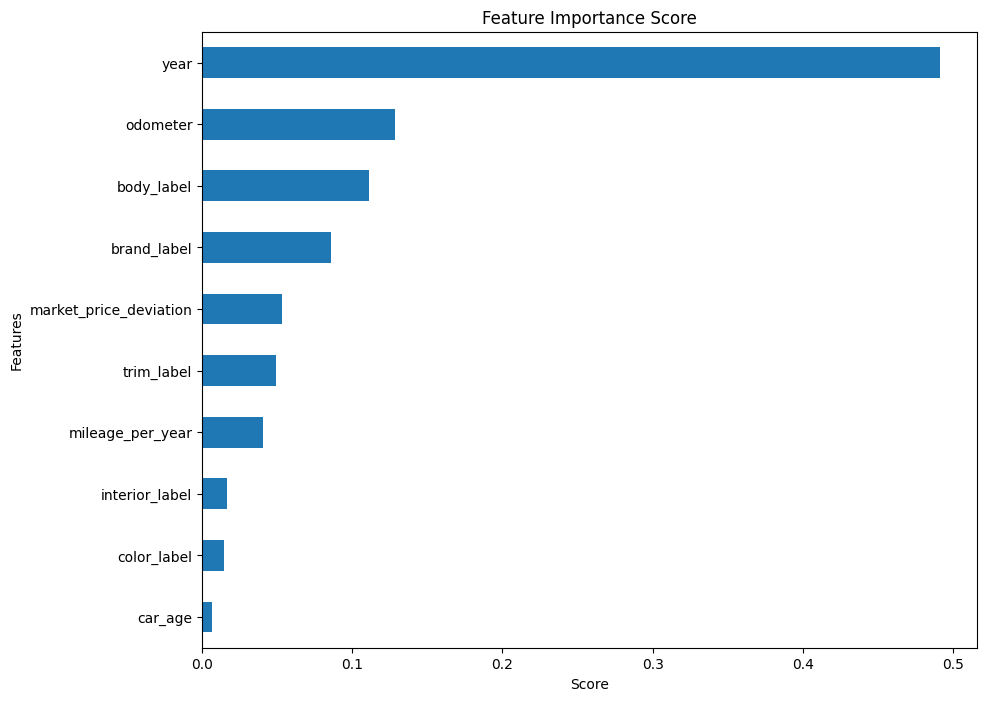

In [49]:
#Calculating feature importances using the trained RandomForestRegressor model
feature_importance = pd.Series(rf.feature_importances_, index=X.columns)

#Plotting the top 10 important features in a horizontal bar chart
ax = feature_importance.nlargest(10).plot(kind='barh', figsize=(10, 8))

#Invert y-axis for better visualization
ax.invert_yaxis()

#Set labels for x and y axes, and the title of the plot
plt.xlabel('Score')
plt.ylabel('Features')
plt.title('Feature Importance Score')

#### In car auctions, it appears that the year of the car, followed by the odometer reading and the vehicle's body type, are the key factors influencing consumers' decisions to bid or purchase. Among these factors, the year of the car stands out as the most significant factor influencing consumer choices.

<div style="position: relative; background: #3567A8; color: white; padding: 10px 15px; text-align: center; border-radius: 6px;">
    <span style="position: absolute; left: -25px; top: 10px; transform: rotate(-45deg); background: #3567A8; padding: 5px 10px; border-radius: 3px;">Section 1</span>
    <h1 style="font-size: 30px;">Model Selection </h1>
</div>

<div style="position: relative; background: #3567A8; color: white; padding: 10px 15px; text-align: center; border-radius: 6px;">
    <span style="position: absolute; left: -25px; top: 10px; transform: rotate(-45deg); background: #3567A8; padding: 5px 10px; border-radius: 3px;">Section 1</span>
    <h1 style="font-size: 30px;">Model Explainability </h1>
</div>

<div style="position: relative; background: #3567A8; color: white; padding: 10px 15px; text-align: center; border-radius: 6px;">
    <span style="position: absolute; left: -25px; top: 10px; transform: rotate(-45deg); background: #3567A8; padding: 5px 10px; border-radius: 3px;">Section 1</span>
    <h1 style="font-size: 30px;">Bonus 1? </h1>
</div>